## 一个例子

目前，您将准备汽车数据集，在尝试训练任何机器学习模型之前，需要自己装备数据集，注意该数据存在许多必须解决的问题。此外，将应用一些特征工程的操作


In [143]:
#一 导入库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
# from sklearn.cluster import KMeans,MiniBatchKMeans
%matplotlib inline 

#科学计算库

In [126]:
# 二，观察数据集
auto_prices = pd.read_csv('../data/automobile_data_price/Automobile price data _Raw_.csv')
auto_prices.head(20)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [127]:
# 三 重新编码名称
auto_prices.columns = [str.replace("-","_") for str in auto_prices.columns]

In [128]:
# 四处理缺失值,找到所有？号 的的列
(auto_prices.astype(np.object)=='?').any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [129]:
auto_prices.dtypes  # 这里object说明存在缺失值

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [130]:
#统计每一列有多少个缺失值
for col in auto_prices.columns:
    if auto_prices[col].dtype == object:
        count = 0
        count = [count +1 for x in auto_prices[col] if x =='?']
        print(col + " "+str(sum(count)))

normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


In [131]:
auto_prices.drop('normalized_losses',axis=1,inplace=True)
cols = ['price','bore','stroke','horsepower','peak_rpm']
for column in cols:   
    auto_prices.loc[auto_prices[column]=='?',column] = np.nan # 填充 nan
auto_prices.dropna(axis=0,inplace=True) #剔除 出现nan的那一行
auto_prices.shape

(195, 25)

In [132]:
#五 转换数据类型
for column in cols:
    auto_prices[column] = pd.to_numeric(auto_prices[column])
auto_prices[cols].dtypes

price           int64
bore          float64
stroke        float64
horsepower      int64
peak_rpm        int64
dtype: object

In [133]:
# 六，特征工程
auto_prices['num_of_cylinders'].value_counts()

four      155
six        24
five       10
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [134]:
#分段展示
cylinder_categories = {'three':'three_four','four':'three_four','five':'five_six','six':'five_six',
                     'eight':'eight_twelve','twelve':'eight_twelve'}
auto_prices['num_of_cylinders'] = [cylinder_categories[x] for x in  auto_prices['num_of_cylinders']]
auto_prices['num_of_cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

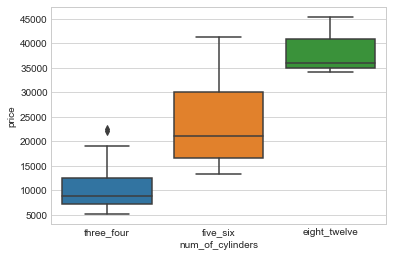

In [135]:
# 七，箱型图
def plot_box(auto_price,col,col_y="price"):
    sns.set_style("whitegrid")
    sns.boxplot(col,col_y,data=auto_price)
    plt.xlabel(col)
    plt.ylabel(col_y)
    plt.show()
plot_box(auto_prices,'num_of_cylinders')

In [136]:
body_cats = {"sedan":"sedan","hatchback":"batchback","wagon":"wagon","hardtop":"hardtop_convert","convertible":"hardtop_convert"}
auto_prices['body_style'] = [body_cats[x] for x in auto_prices['body_style']]
auto_prices['body_style'].value_counts()

sedan              94
batchback          63
wagon              24
hardtop_convert    14
Name: body_style, dtype: int64

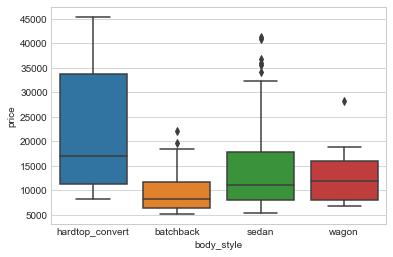

In [137]:
plot_box(auto_prices,'body_style')

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


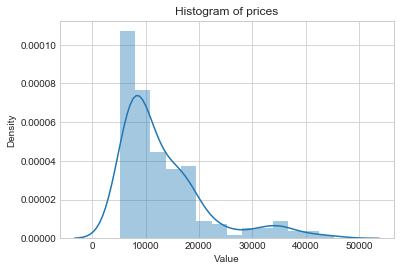

In [138]:
# 九 ，转换变量
def hist_plot(vals,lab):
    sns.distplot(vals)
    plt.title("Histogram of " + lab)
    plt.xlabel("Value")
    plt.ylabel("Density")
hist_plot(auto_prices['price'],'prices')

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


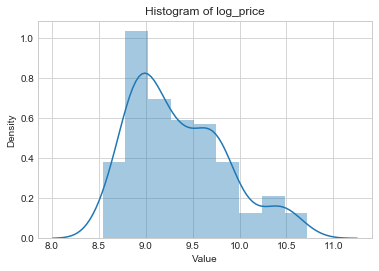

In [139]:
auto_prices['log_price'] = np.log(auto_prices['price'])
hist_plot(auto_prices['log_price'],'log_price')

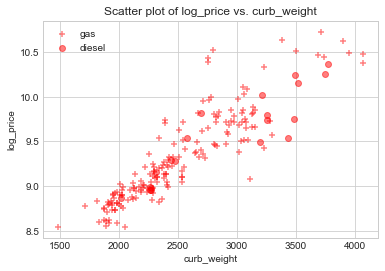

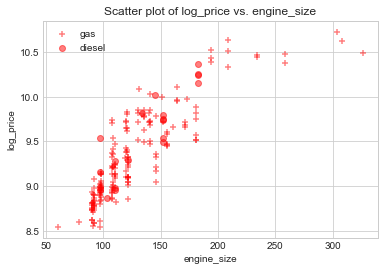

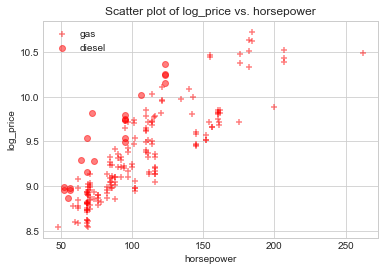

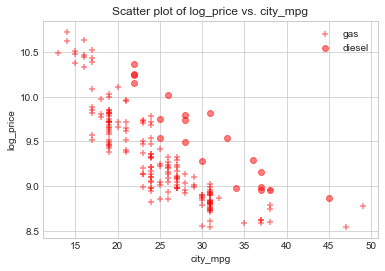

(195, 26)

In [148]:
#十 ，可视化
def plot_scatter_shape(auto_prices,cols,shape_col='fuel_type',col_y='log_price',alpha=0.5):
    shapes=['+','o','s','x','^']
    unique_cats = auto_prices[shape_col].unique()# 对列表中的数据 去重['gas' 'diesel']
    for col in cols:
        sns.set_style('whitegrid')
        for i ,cat in enumerate(unique_cats):
            temp = auto_prices[auto_prices[shape_col] == cat] #分 ['gas' 'diesel']   进行计算
            sns.regplot(x=col,y=col_y,data=temp,marker=shapes[i],label=cat,# 可视化线性回归关系regplot
                       scatter_kws={'alpha':alpha},fit_reg=False,color='red')
        plt.title("Scatter plot of " + col_y+' vs. '+col)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.legend()
        plt.show()
num_cols = ['curb_weight','engine_size','horsepower','city_mpg']
plot_scatter_shape(auto_prices,num_cols)
auto_prices.shape


### 以上图像说明
###    1. 价格的对数不影响
###    2. 如果两个 特征都和价格成 一样线性关系，那么在做特征工程的时候，只需要保留一个就可以了。第一个更好
###    3，如果 点比较集中，说明线性关系较强  点 比较分散程度的话， 说明线性关系 没那么强。不是很有影响的特征。可以剔除。
